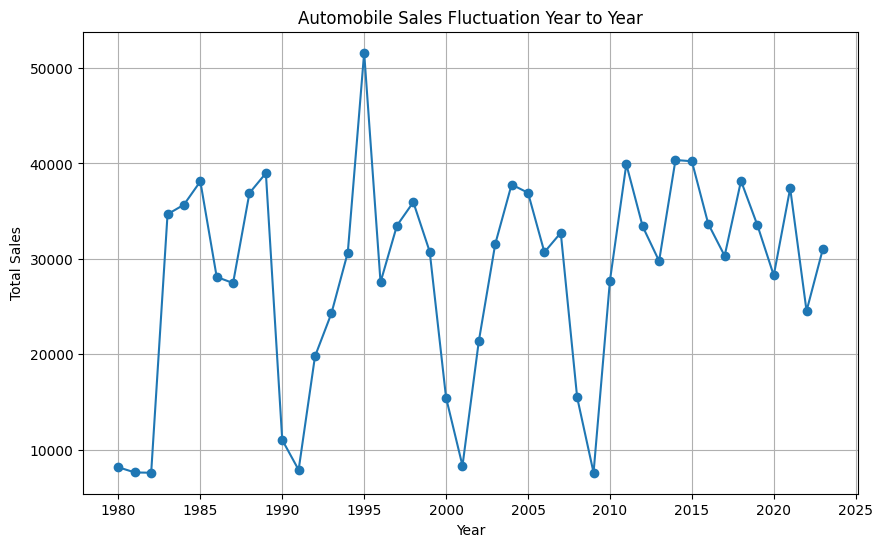

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
data = pd.read_csv(url)

# Convert 'Year' column to datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Group by Year and sum the automobile sales
sales_by_year = data.groupby('Year')['Automobile_Sales'].sum()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year, marker='o')
plt.title('Automobile Sales Fluctuation Year to Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)

# Save the plot
output_path = "C:/Users/oscar/OneDrive/Escritorio/Python_Projects/automobile_sales_visualizations/images/sales_by_year.png"
plt.savefig(output_path)
plt.show()


<Figure size 1000x600 with 0 Axes>

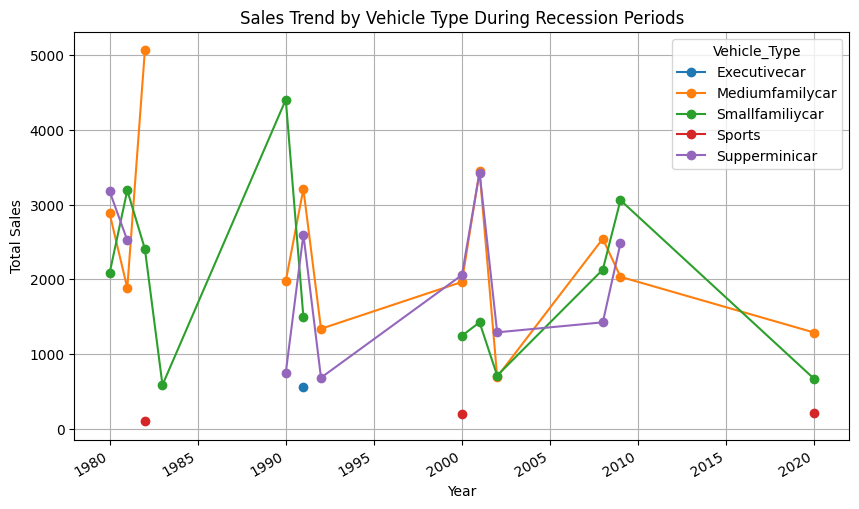

In [4]:
# Filter data for recession periods
recession_data = data[data['Recession'] == 1]

# Group by Year and Vehicle Type, and sum the sales
sales_by_type_year = recession_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plotting the sales trend for each vehicle type during recession periods
plt.figure(figsize=(10, 6))
sales_by_type_year.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6))
plt.title('Sales Trend by Vehicle Type During Recession Periods')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)

# Save the plot
output_path = "C:/Users/oscar/OneDrive/Escritorio/Python_Projects/automobile_sales_visualizations/images/sales_by_vehicle_type_recession.png"
plt.savefig(output_path)
plt.show()


C:\Users\oscar\AppData\Local\Temp\ipykernel_23180\2184840274.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recession_data['Period'] = 'Recession'
C:\Users\oscar\AppData\Local\Temp\ipykernel_23180\2184840274.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_recession_data['Period'] = 'Non-Recession'


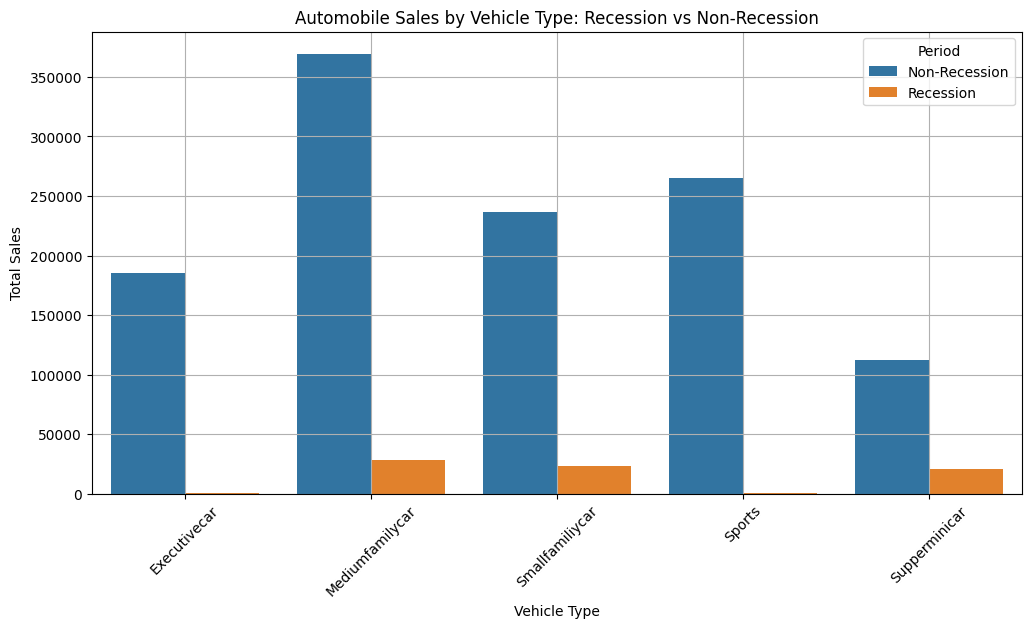

In [15]:

import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for recession and non-recession periods
recession_data = data[data['Recession'] == 1]
non_recession_data = data[data['Recession'] == 0]

# Add a column to differentiate the periods
recession_data['Period'] = 'Recession'
non_recession_data['Period'] = 'Non-Recession'

# Combine the two datasets
combined_data = pd.concat([recession_data, non_recession_data])

# Group by Vehicle Type and Period, and sum the sales
sales_by_period_type = combined_data.groupby(['Vehicle_Type', 'Period'])['Automobile_Sales'].sum().reset_index()

# Create the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Period', data=sales_by_period_type)

# Title and labels
plt.title('Automobile Sales by Vehicle Type: Recession vs Non-Recession')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)

# Save the plot
output_path = "C:/Users/oscar/OneDrive/Escritorio/Python_Projects/automobile_sales_visualizations/images/Bar_Chart.png"
plt.savefig(output_path)
plt.show()


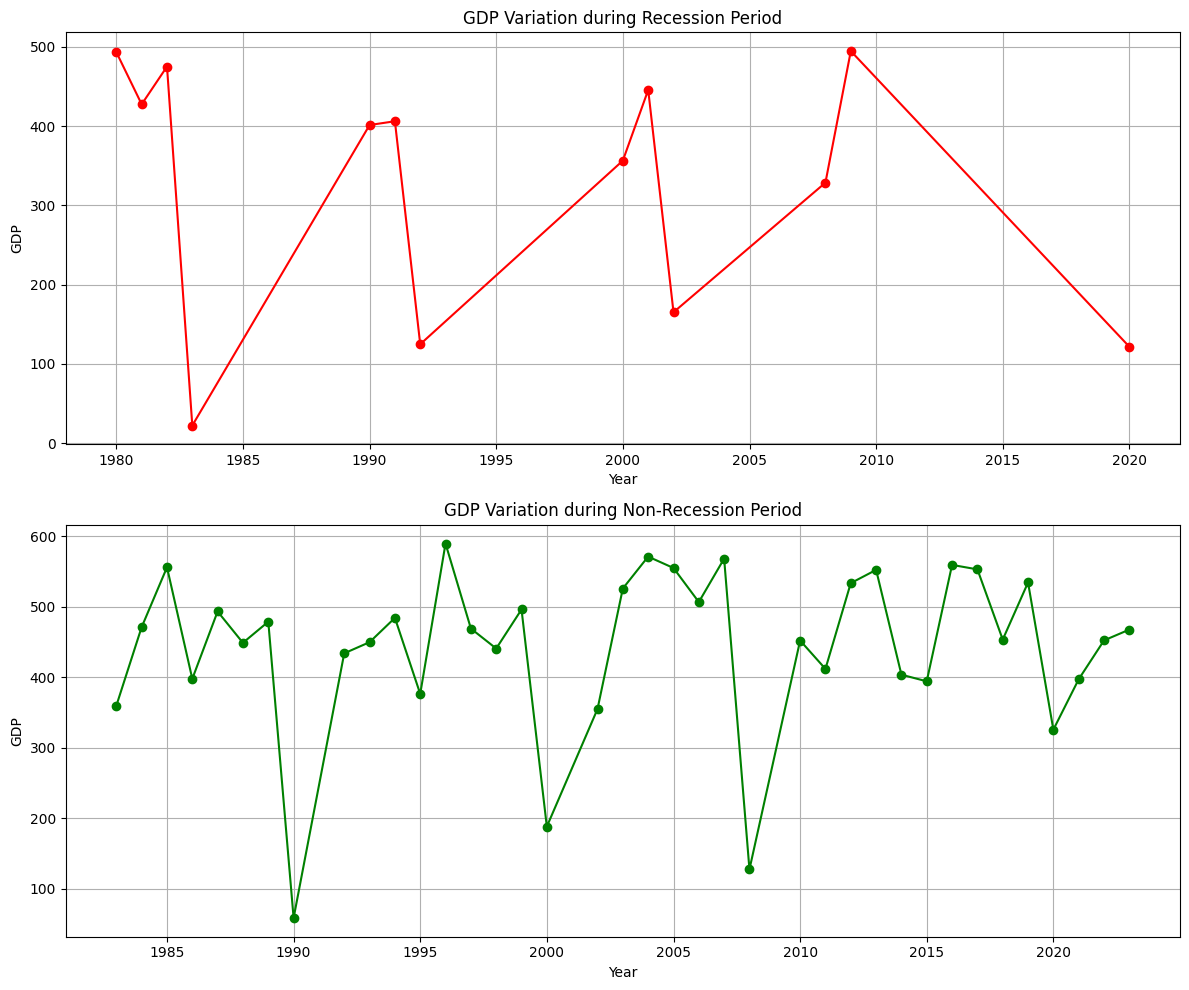

In [6]:
import matplotlib.pyplot as plt

# Filter data for recession and non-recession periods
recession_data = data[data['Recession'] == 1]
non_recession_data = data[data['Recession'] == 0]

# Group by Year and Period, and sum the GDP for each period
gdp_recession = recession_data.groupby('Year')['GDP'].sum()
gdp_non_recession = non_recession_data.groupby('Year')['GDP'].sum()

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot for recession period
axes[0].plot(gdp_recession.index, gdp_recession, marker='o', color='r')
axes[0].set_title('GDP Variation during Recession Period')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')
axes[0].grid(True)

# Plot for non-recession period
axes[1].plot(gdp_non_recession.index, gdp_non_recession, marker='o', color='g')
axes[1].set_title('GDP Variation during Non-Recession Period')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Save the plot
output_path = "C:/Users/oscar/OneDrive/Escritorio/Python_Projects/automobile_sales_visualizations/images/gdp_comparison_recession_non_recession.png"
plt.savefig(output_path)
plt.show()


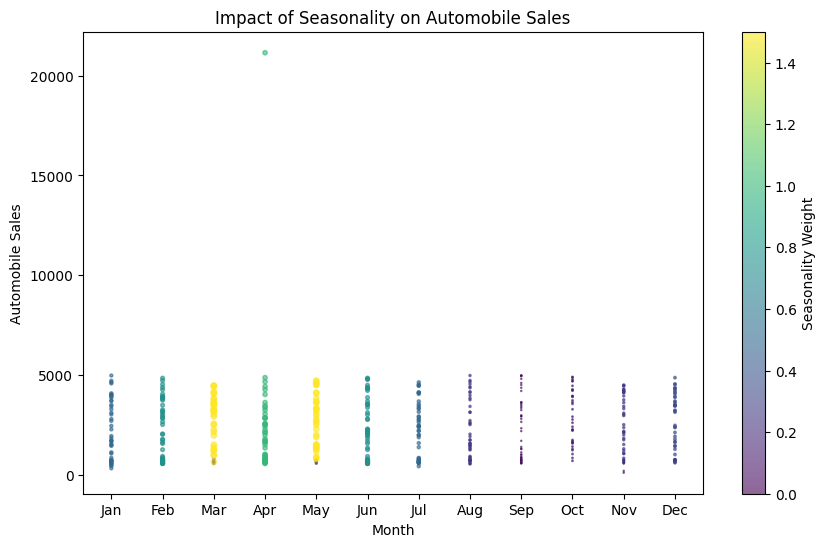

In [7]:
# Bubble plot for Seasonality impact on Automobile Sales
plt.figure(figsize=(10, 6))
plt.scatter(data['Month'], data['Automobile_Sales'], s=data['Seasonality_Weight']*10, c=data['Seasonality_Weight'], cmap='viridis', alpha=0.6)

# Title and labels
plt.title('Impact of Seasonality on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.colorbar(label='Seasonality Weight')

# Save the plot
output_path = "C:/Users/oscar/OneDrive/Escritorio/Python_Projects/automobile_sales_visualizations/images/bubble_plot_seasonality_impact.png"
plt.savefig(output_path)
plt.show()


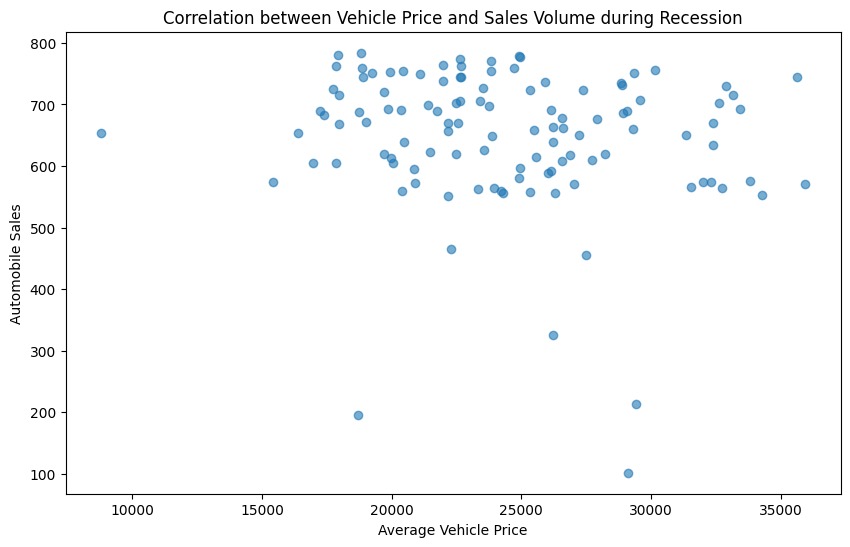

In [8]:
# Filter data for recession periods
recession_data = data[data['Recession'] == 1]

# Scatter plot for price vs. sales volume during recessions
plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'], alpha=0.6)

# Title and labels
plt.title('Correlation between Vehicle Price and Sales Volume during Recession')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')

# Save the plot
output_path = "C:/Users/oscar/OneDrive/Escritorio/Python_Projects/automobile_sales_visualizations/images/scatter_plot_price_sales_recession.png"
plt.savefig(output_path)
plt.show()


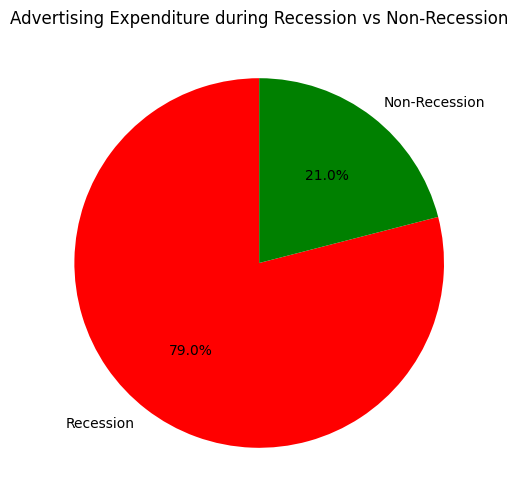

In [9]:
# Calculate advertising expenditure during recession and non-recession periods
ad_expenditure = data.groupby('Recession')['Advertising_Expenditure'].sum()

# Pie chart for advertising expenditure
plt.figure(figsize=(6, 6))
plt.pie(ad_expenditure, labels=['Recession', 'Non-Recession'], autopct='%1.1f%%', startangle=90, colors=['r', 'g'])

# Title
plt.title('Advertising Expenditure during Recession vs Non-Recession')

# Save the plot
output_path = "C:/Users/oscar/OneDrive/Escritorio/Python_Projects/automobile_sales_visualizations/images/pie_chart_ad_expenditure_recession_non_recession.png"
plt.savefig(output_path)
plt.show()


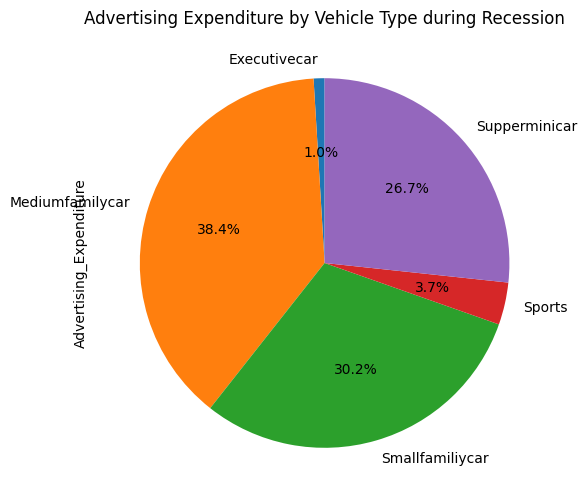

In [10]:
# Filter data for recession periods
recession_data = data[data['Recession'] == 1]

# Calculate total advertising expenditure by vehicle type during recession period
ad_expenditure_by_type = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Pie chart for advertising expenditure by vehicle type
plt.figure(figsize=(6, 6))
ad_expenditure_by_type.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)

# Title
plt.title('Advertising Expenditure by Vehicle Type during Recession')

# Save the plot
output_path = "C:/Users/oscar/OneDrive/Escritorio/Python_Projects/automobile_sales_visualizations/images/pie_chart_ad_expenditure_vehicle_type_recession.png"
plt.savefig(output_path)
plt.show()


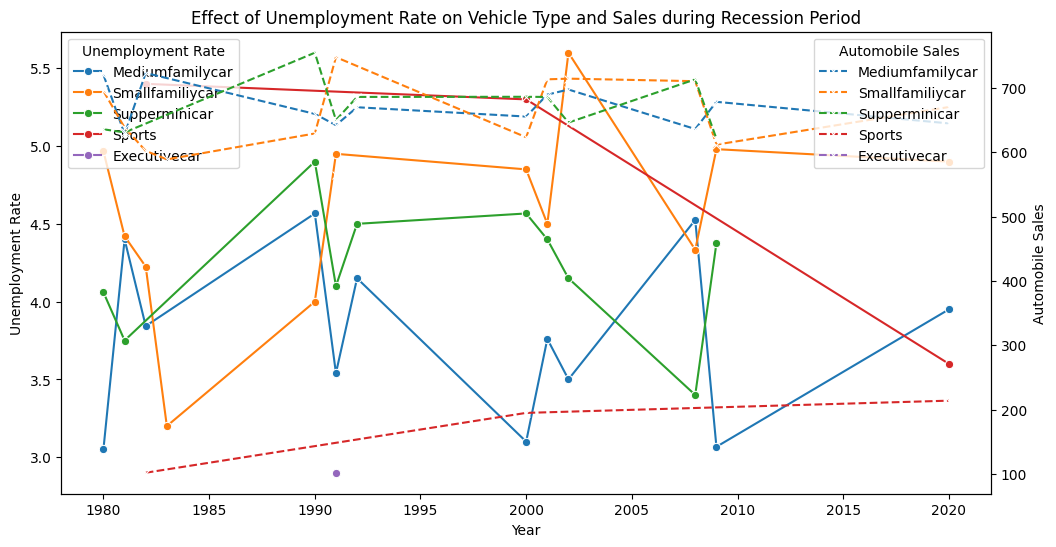

In [14]:
# Filter data for recession periods
recession_data = data[data['Recession'] == 1]

# Group by Year and Vehicle Type, and calculate the mean unemployment rate and sales
unemployment_sales_by_type = recession_data.groupby(['Year', 'Vehicle_Type'])[['unemployment_rate', 'Automobile_Sales']].mean().reset_index()

# Line plot to analyze the effect of the unemployment rate on sales by vehicle type
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Unemployment Rate
sns.lineplot(x='Year', y='unemployment_rate', hue='Vehicle_Type', data=unemployment_sales_by_type, ax=ax1, marker='o')

# Create a second y-axis for Automobile Sales
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Automobile_Sales', hue='Vehicle_Type', data=unemployment_sales_by_type, ax=ax2, marker='x', linestyle='--')

# Title and labels
ax1.set_title('Effect of Unemployment Rate on Vehicle Type and Sales during Recession Period')
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate')
ax2.set_ylabel('Automobile Sales')

# Show the legends for both axes
ax1.legend(title='Unemployment Rate', loc='upper left')
ax2.legend(title='Automobile Sales', loc='upper right')

# Save the plot
output_path = "C:/Users/oscar/OneDrive/Escritorio/Python_Projects/automobile_sales_visualizations/images/line_plot_unemployment_sales_recession.png"
plt.savefig(output_path)
plt.show()
